## 1. Aplicaciones y reseñas de Google Play Store

Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativas. Debido a estos dos factores, cada vez se desarrollan más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos ideas en los datos para idear estrategias que impulsen el crecimiento y la retención.

Echemos un vistazo a los datos, que constan de dos archivos

apps.csv: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una app determinada.
user_reviews.csv: contiene 100 reseñas para cada app, las más útiles primero. El texto de cada reseña ha sido preprocesado y atribuido con tres nuevas características: Sentimiento (Positivo, Negativo o Neutral), Polaridad del Sentimiento y Subjetividad del Sentimiento.



In [6]:
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')
apps= apps_with_duplicates

#Imprimir el numero total de aplicaciones
print ("Total de aplicaciones en el dataset = " , apps['App'].count())
# Tambien se puede obtener el total de aplicaciones con len
print ("Total de aplicaciones en el dataset = " , len(apps['App']))

# Imprime un resumen conciso del marco de datos de las aplicaciones
print (apps.info())






Total de aplicaciones en el dataset =  9659
Total de aplicaciones en el dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [9]:
# Obtener una mirada aleatoria de n filas
apps.sample(n=5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
620,750,Brilliant,EDUCATION,4.5,41185,NaN,"1,000,000+",Free,0,Everyone,Education,"August 3, 2018",Varies with device,Varies with device
4682,5663,Learners Test Free: AU Driver Knowledge Test (...,FAMILY,3.9,623,8.5,"100,000+",Free,0,Everyone,Education,"March 26, 2018",3.5,4.1 and up
6910,7972,CV Maker for Job Applications:Photo Resume Bui...,TOOLS,4.0,114,25.0,"10,000+",Free,0,Everyone,Tools,"June 9, 2018",1.5,4.0 and up
3741,4657,Wi u Emulator,FAMILY,2.4,468,7.2,"10,000+",Free,0,Everyone,Entertainment,"March 3, 2018",0.0.1,4.1 and up
2061,2607,YouNow: Live Stream Video Chat,SOCIAL,4.1,309872,85.0,"10,000,000+",Free,0,Teen,Social,"August 3, 2018",14.0.13,4.1 and up


In [ ]:
# Informacion de las variables de cada columna
apps.info()

## 2. Data Cleaning
Las cuatro características con las que trabajaremos más frecuentemente en adelante son Instalaciones, Tamaño, Valoración y Precio. La función info() (de la tarea anterior) nos indicó que las columnas Instalaciones y Precio son de tipo objeto y no int64 o float64 como cabría esperar. Esto se debe a que la columna contiene algunos caracteres más que los dígitos [0,9]. Lo ideal sería que estas columnas fueran numéricas, como su nombre indica.
Por lo tanto, ahora procedemos a la limpieza de los datos y los preparamos para ser consumidos en nuestro análisis más tarde. En concreto, la presencia de caracteres especiales (, $ +) en las columnas Instalaciones y Precio dificulta su conversión a un tipo de datos numérico.

In [14]:
#Limpiar datos, precio e instalaciones aparecen como objetos. Estos datos se deben limpiar para transformarlos
#en un float y trabajarlo como un numero

signos_to_remove=['+', ',', '$']
Col_remplazar = ['Installs', 'Price']
for col in Col_remplazar:
    #Reemplazar cada caracter con un string vacio
     
    for chart in signos_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(chart, ''))
        
    apps[col]=pd.to_numeric(apps[col])

In [15]:
#Corroborar cambio
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


## 3. Explorar las categorías de aplicaciones
Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para construir una audiencia global. Para que las empresas consigan que sus aplicaciones lleguen a los usuarios, es importante hacerlas más rápidas y fáciles de descubrir en Google Play. Para mejorar la experiencia general de búsqueda, Google ha introducido el concepto de agrupación de aplicaciones en categorías.

Esto nos lleva a las siguientes preguntas:

¿Qué categoría tiene la mayor cuota de aplicaciones (activas) en el mercado?
¿Hay alguna categoría específica que domine el mercado?
¿Qué categorías tienen el menor número de aplicaciones?
Veremos que hay 33 categorías únicas de aplicaciones presentes en nuestro conjunto de datos. Las aplicaciones familiares y de juegos tienen la mayor prevalencia en el mercado. Curiosamente, las aplicaciones de herramientas, negocios y medicina también están en la cima.

La cantidad de categorías únicas son:  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


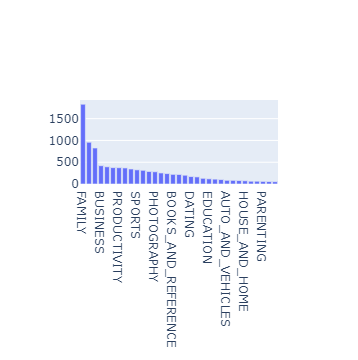

In [24]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Contar las categorias del archivo
Category_count= len(df['Category'].unique())
print ('La cantidad de categorías únicas son: ', Category_count)

#Contar el numero de aplicaciones en cada "Category" y ordenarlas en orden descendente
num_apps_in_category= apps["Category"].value_counts()
print (num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

## 5. Distribución de las valoraciones de las aplicaciones
Después de haber visto la cuota de mercado de cada categoría de aplicaciones, veamos cómo se comportan todas estas aplicaciones en promedio. Las valoraciones de las aplicaciones (en una escala de 1 a 5) influyen en la capacidad de descubrimiento, la conversión de las aplicaciones y la imagen de marca de la empresa. Las valoraciones son un indicador clave del rendimiento de una aplicación.

Según nuestra investigación, el volumen medio de valoraciones en todas las categorías de aplicaciones es de 4,17. El diagrama del histograma está sesgado hacia la izquierda, lo que indica que la mayoría de las aplicaciones están muy bien valoradas, con sólo unas pocas excepciones en las aplicaciones poco valoradas.

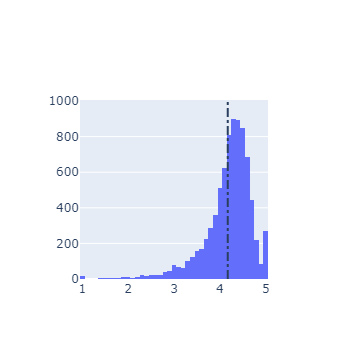

In [25]:
# Promedio rating de aplicaciones
avg_app_rating = apps['Rating'].mean()

#Distribucion de la aplicaciones de acuerdo a su rating
data = [go.Histogram(x = apps ['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})
 

## 6. Tamaño y precio de una aplicación
Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede resultar difícil y/o costosa de descargar para los usuarios. Los largos tiempos de descarga podrían desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. En cuanto al precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o baratas. Estos problemas se agravan si el mundo en desarrollo forma parte de su mercado objetivo, especialmente debido a las velocidades de Internet, el poder adquisitivo y los tipos de cambio.

¿Cómo podemos elaborar estrategias eficaces para dimensionar y fijar el precio de nuestra aplicación?

¿Afecta el tamaño de una aplicación a su valoración?
¿Los usuarios realmente se preocupan por las aplicaciones con un sistema pesado o prefieren las aplicaciones ligeras?
¿Afecta el precio de una aplicación a su valoración?
¿Los usuarios prefieren siempre las aplicaciones gratuitas a las de pago?
Hemos comprobado que la mayoría de las aplicaciones mejor valoradas (con una puntuación superior a 4) tienen entre 2 y 20 MB. También encontramos que la gran mayoría de las aplicaciones tienen un precio inferior a 10 dólares.

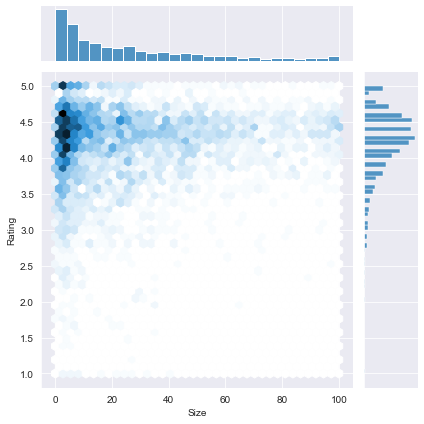

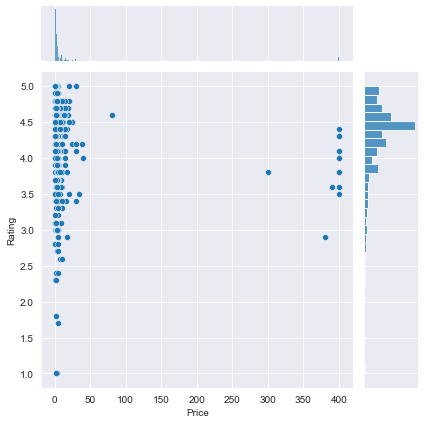

In [35]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relación entre la categoría de la aplicación y su precio
Así que ahora viene la parte difícil. ¿Cómo pueden las empresas y los desarrolladores llegar a fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar los beneficios? Los costes de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma.

Hay muchos factores que hay que tener en cuenta a la hora de seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante tener en cuenta la disposición de su cliente a pagar por su aplicación. Un precio incorrecto podría romper el trato antes de que se produzca la descarga. Los clientes potenciales podrían desistir por lo que perciben como un coste escandaloso, o podrían eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.

Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones sencillas y de uso diario, como la de la calculadora, deberían ser gratuitas. Sin embargo, tendría sentido cobrar por una app médica altamente especializada que diagnostica a los pacientes diabéticos. A continuación, vemos que las aplicaciones médicas y familiares son las más caras. Algunas aplicaciones médicas alcanzan incluso los 80 dólares. Todas las aplicaciones de juegos tienen un precio razonable por debajo de los 20 dólares.

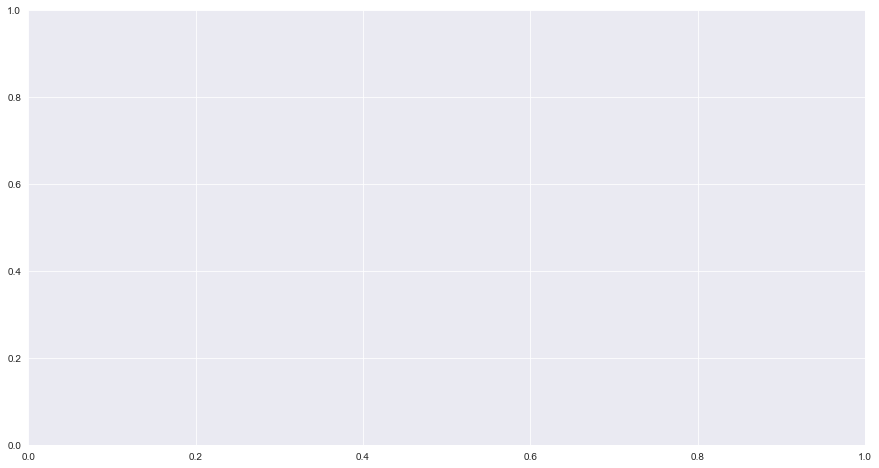

In [38]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
fig.set_size_inches(15, 8)

#Seleccionar unas pocas categorias de aplicaciones populares
popular_app_cats= apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

In [39]:
apps.Category

0            ART_AND_DESIGN
1            ART_AND_DESIGN
2            ART_AND_DESIGN
3            ART_AND_DESIGN
4            ART_AND_DESIGN
               ...         
9654                 FAMILY
9655                 FAMILY
9656                MEDICAL
9657    BOOKS_AND_REFERENCE
9658              LIFESTYLE
Name: Category, Length: 9659, dtype: object

In [27]:
import numpy as np

# Convertir la columna de instalaciones en un float
df['Installs'] = df['Installs'].astype(np.float64)

# Convertir la columna de instalaciones en un float
df['Price'] = df['Price'].astype(np.float64)

# Checking dtypes of the apps dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   float64
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB
None


In [34]:
numero_por_categorias= df['Category'].value_counts()
ordenar_numero_por_categorias= numero_por_categorias.sort_values()
print (numero_por_categorias)


FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


In [44]:
Category_Price= df.groupby('Category')[['Installs','Price']].mean()

In [45]:
Category_Price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, ART_AND_DESIGN to WEATHER
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Installs  33 non-null     float64
 1   Price     33 non-null     float64
dtypes: float64(2)
memory usage: 792.0+ bytes


In [47]:
Category_Price['Price'].sort_values()

Category
HOUSE_AND_HOME         0.000000
BEAUTY                 0.000000
COMICS                 0.000000
LIBRARIES_AND_DEMO     0.011786
NEWS_AND_MAGAZINES     0.015669
SHOPPING               0.027129
VIDEO_PLAYERS          0.064172
SOCIAL                 0.066820
FOOD_AND_DRINK         0.075714
ENTERTAINMENT          0.078235
ART_AND_DESIGN         0.093281
EDUCATION              0.150924
AUTO_AND_VEHICLES      0.158471
PARENTING              0.159667
DATING                 0.160468
MAPS_AND_NAVIGATION    0.205725
HEALTH_AND_FITNESS     0.223438
TRAVEL_AND_LOCAL       0.228082
COMMUNICATION          0.263937
GAME                   0.296465
SPORTS                 0.307692
TOOLS                  0.323156
PERSONALIZATION        0.400213
WEATHER                0.410380
BUSINESS               0.417357
PHOTOGRAPHY            0.420925
BOOKS_AND_REFERENCE    0.539505
PRODUCTIVITY           0.670936
FAMILY                 1.309967
EVENTS                 1.718594
MEDICAL                2.520759

In [49]:
df.groupby('Category')[['Installs','Price']].mean()

,Installs,Price
Category,,
ART_AND_DESIGN,1.786533e+06,0.093281
AUTO_AND_VEHICLES,6.250613e+05,0.158471
BEAUTY,5.131519e+05,0.000000
BOOKS_AND_REFERENCE,7.504367e+06,0.539505
BUSINESS,1.659916e+06,0.417357
COMICS,8.032348e+05,0.000000
COMMUNICATION,3.504215e+07,0.263937
DATING,8.241293e+05,0.160468
EDUCATION,2.965983e+06,0.150924


In [50]:
df['Ventas']= df['Installs']*df['Price']

In [51]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ventas
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [52]:
df_Paid = df[df['Type']=='Paid']

In [54]:
df_Paid.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ventas
233,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,499000.0
234,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,499000.0
372,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,399000.0
406,476,"Moco+ - Chat, Meet People",DATING,4.2,1545,NaN,10000.0,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,39900.0
407,477,Calculator,DATING,2.6,57,6.2,1000.0,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,6990.0


In [64]:
Ordenado = df_Paid.sort_values('Ventas', ascending= False)

In [67]:
Ordenado.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ventas
1743,2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
4396,5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up,39999000.0
4400,5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,19999500.0
3208,4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
6370,7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000.0,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,6990000.0


In [69]:
df_Paid.sort_values(['Installs', 'Rating'], ascending = False)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Ventas
3208,4034,Hitman Sniper,GAME,4.6,408292,29.0,10000000.0,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,9900000.0
1743,2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,69900000.0
8538,9678,Where's My Water?,FAMILY,4.7,188740,69.0,1000000.0,Paid,1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,1990000.0
3375,4260,Cut the Rope GOLD,FAMILY,4.6,61264,43.0,1000000.0,Paid,0.99,Everyone,Puzzle,"June 19, 2018",3.7.0,4.1 and up,990000.0
4650,5631,Five Nights at Freddy's,GAME,4.6,100805,50.0,1000000.0,Paid,2.99,Teen,Action,"December 2, 2014",1.85,2.3 and up,2990000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,9337,EG | Explore Folegandros,TRAVEL_AND_LOCAL,NaN,0,56.0,0.0,Paid,3.99,Everyone,Travel & Local,"January 22, 2017",1.1.1,4.1 and up,0.0
8577,9719,EP Cook Book,MEDICAL,NaN,0,3.2,0.0,Paid,200.00,Everyone,Medical,"July 26, 2015",1,3.0 and up,0.0
8751,9905,Eu sou Rico,FINANCE,NaN,0,2.6,0.0,Paid,30.99,Everyone,Finance,"January 9, 2018",1,4.0 and up,0.0
8763,9917,Eu Sou Rico,FINANCE,NaN,0,1.4,0.0,Paid,394.99,Everyone,Finance,"July 11, 2018",1,4.0.3 and up,0.0


## 1. Aplicaciones y reseñas de Google Play Store

Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativas. Debido a estos dos factores, cada vez se desarrollan más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos ideas en los datos para idear estrategias que impulsen el crecimiento y la retención.

